In [1]:
# importing the data 

import pandas as pd
df=pd.read_csv('IMDbMoviesIndia.csv',encoding='latin1')
df.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [2]:
# droping the unnesscary coloums
df=df.drop('Duration',axis=1)
df.head()


,Name,Year,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [3]:
# filling the null values with 0
df=df.fillna(0)
df.head()

,Name,Year,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,0,Drama,0.0,0,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),"Drama, Musical",0.0,0,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),Drama,0.0,0,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
# data cleaning and pre processing


from sklearn.preprocessing import LabelEncoder

# Convert 'Genre' to strings and then numerical values(label encoding)
df['Genre'] = df['Genre'].astype(str)
label_encoder = LabelEncoder()
df['Genre'] = label_encoder.fit_transform(df['Genre'])

# convorting votes to numeric
df['Votes'] = df['Votes'].replace('[^\d.]', '', regex=True).astype(float)

# Convert categorical columns to strings and then numerical values(label encoding)
label_encoder_director = LabelEncoder()
label_encoder_actor = LabelEncoder()
for col in ['Director', 'Actor 1', 'Actor 2', 'Actor 3']:
    df[col] = df[col].astype(str)
    df[col] = label_encoder_director.fit_transform(df[col])


df.head()

,Name,Year,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,0,300,0.0,0.0,1927,2251,801,3109
1,#Gadhvi (He thought he was Gandhi),(2019),300,7.0,8.0,1549,3281,4791,528
2,#Homecoming,(2021),352,0.0,0.0,5124,3714,2867,3451
3,#Yaaram,(2019),229,4.4,35.0,3320,2918,1505,4021
4,...And Once Again,(2010),300,0.0,0.0,386,3113,3463,406


In [5]:
# performing EDA for more information on data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display basic information about the dataset
print(df.info())

# Summary statistics
print(df.describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      15509 non-null  object 
 2   Genre     15509 non-null  int32  
 3   Rating    15509 non-null  float64
 4   Votes     15509 non-null  float64
 5   Director  15509 non-null  int32  
 6   Actor 1   15509 non-null  int32  
 7   Actor 2   15509 non-null  int32  
 8   Actor 3   15509 non-null  int32  
dtypes: float64(2), int32(5), object(2)
memory usage: 787.7+ KB
None
              Genre        Rating          Votes      Director       Actor 1  \
count  15509.000000  15509.000000   15509.000000  15509.000000  15509.000000   
mean     213.717325      2.982771     989.821920   2787.772132   2083.330260   
std      164.455445      3.082644    8346.898848   1708.077510   1446.288798   
min        0.000000      0.000000       0.000000      0.000000      0.0000

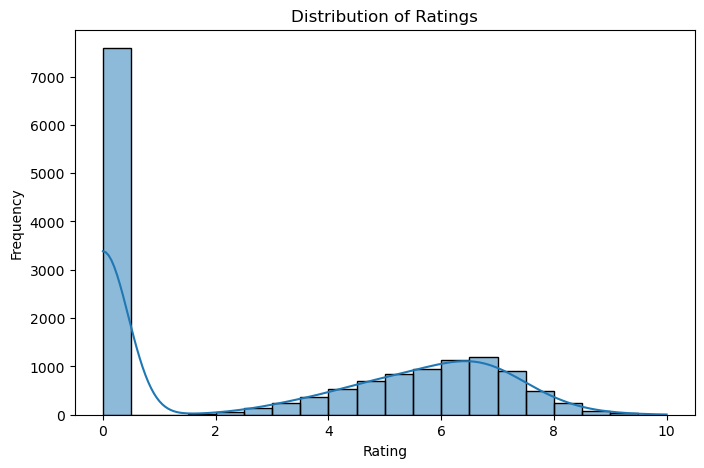

In [6]:
# Visualize the distribution of the 'Rating' column
plt.figure(figsize=(8, 5))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()




In [7]:
# pre processing the data based on EDA

# Replace zero values with the median of non-zero values
median_votes = df[df['Votes'] > 0]['Votes'].median()
df['Votes'] = df['Votes'].replace(0, median_votes)
df.head()

,Name,Year,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,0,300,0.0,55.0,1927,2251,801,3109
1,#Gadhvi (He thought he was Gandhi),(2019),300,7.0,8.0,1549,3281,4791,528
2,#Homecoming,(2021),352,0.0,55.0,5124,3714,2867,3451
3,#Yaaram,(2019),229,4.4,35.0,3320,2918,1505,4021
4,...And Once Again,(2010),300,0.0,55.0,386,3113,3463,406


In [8]:
# creating the model

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor



X = df[['Genre', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']]
y = df['Rating']


# Split the data into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the model
rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score: ",r2)



Mean Squared Error: 0.8660619916272656
R^2 Score:  0.907455513603928


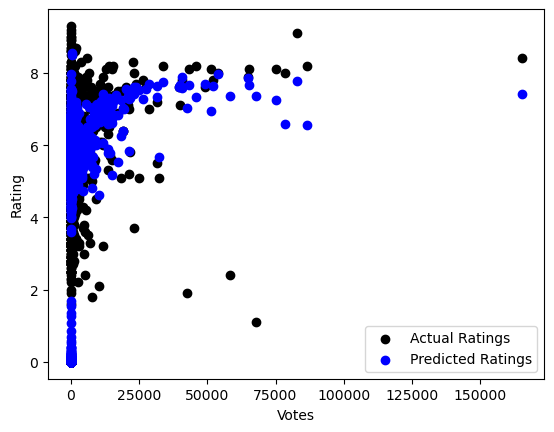

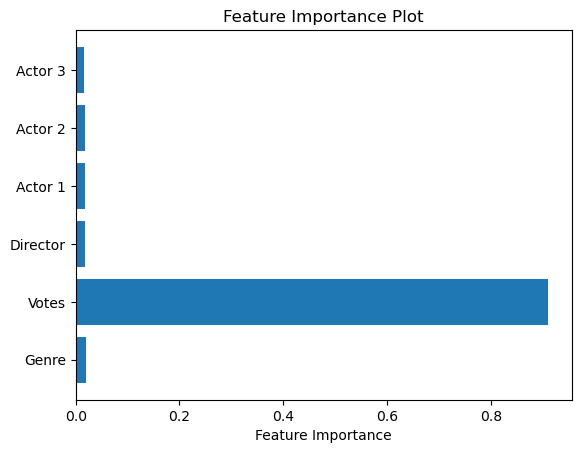

In [9]:

# Visualize the predictions with scatter plot
plt.scatter(X_test['Votes'], y_test, color='black', label='Actual Ratings')
plt.scatter(X_test['Votes'], y_pred, color='blue', label='Predicted Ratings')
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.legend()
plt.show()


#Visualise the predictions with Feature Importance Plot 
feature_importances = rf_regressor.feature_importances_
feature_names = X.columns
plt.barh(feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance Plot')
plt.show()


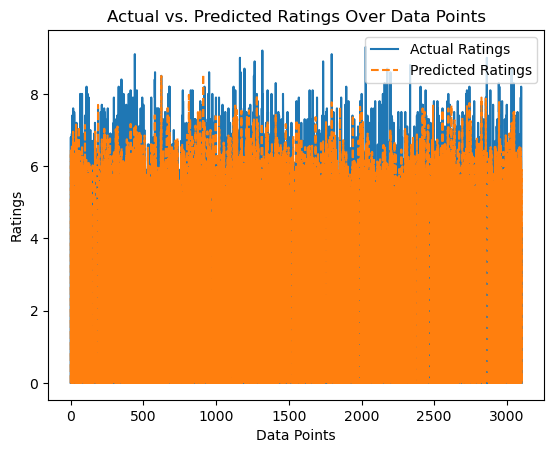

In [10]:
# visualise using line plot
plt.plot(y_test.values, label='Actual Ratings')
plt.plot(y_pred, label='Predicted Ratings', linestyle='--')
plt.xlabel("Data Points")
plt.ylabel("Ratings")
plt.title("Actual vs. Predicted Ratings Over Data Points")
plt.legend()
plt.show()



In [11]:
# saving the model

import joblib


model_name = 'movie_prediction.pkl'
joblib.dump(rf_regressor, model_name)

print("Model saved")


Model saved
